<a href="https://colab.research.google.com/github/Fakahmad/Machine_Learning/blob/main/Email_spam_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# *Ham and Spam E-Mails Classification Using Machine Learning Techniques*
# Spam emails have become a significant challenge, accounting for more
# than 85% of global email traffic. Spam emails cause a variety of issues,
# including wasted bandwidth, storage, and user productivity. The goal of the
# project is to develop an automated spam email classifier with high accuracy
# and low computational costs for real-time applications.

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd  # For handling data in a DataFrame format
from sklearn.preprocessing import MinMaxScaler  # For normalizing the data
import numpy as np  # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Some additional libraries are imported within the notebook, before they are used

In [ ]:
# Load the dataset from Google Drive
# Make sure to change the file path to the correct location where the file is stored on your Google Drive
#file_path = '/content/drive/My Drive/spam_dataset.xlsx'
file_path = '/content/drive/Othercomputers/My Laptop/Google Drive/ML_GLP2_Projects/spam_email/spam_data_file.xlsx'
df = pd.read_excel(file_path)

# Let's look at the first few rows of the dataset to understand its structure
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Display column information and initial statistics
print("=== Dataset Information ===")
# Display information about each column (data types, non-null counts, etc.)
df.info()

# Explanation:
# The .info() method provides a concise summary of the DataFrame, including:
# - Number of entries (rows)
# - Number of columns
# - Data types of each column (e.g., float, int, object)
# - Number of non-null values in each column
# - Memory usage of the dataset

# Conclusion from .info():
# - If any columns have missing values, we can detect them here (columns where the non-null count is less than the total number of rows).
# - We'll also check if all columns have appropriate data types (e.g., no unexpected 'object' type for numerical data).


=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_

In [ ]:
# column info conforms as per given in project documentation

In [ ]:
print("\n=== Statistical Summary ===")
# Get basic statistical information (mean, standard deviation, min, max, quartiles) for each column
print(df.describe())

# Explanation:
# The .describe() method provides useful statistics about numerical columns:
# - Count: Number of non-null values
# - Mean: Average value
# - Std: Standard deviation (spread of the data)
# - Min/Max: Minimum and maximum values in the column
# - 25%, 50%, 75%: Percentiles, which show the distribution of values
#
# Conclusion from .describe():
# - We can identify potential outliers by looking at min/max values.
# - We can check for columns that have very small standard deviation (low variability), which may not contribute much to the model.
# - Skewness in the data can also be inferred from large differences between mean and percentiles (especially 50%).


=== Statistical Summary ===
       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
m

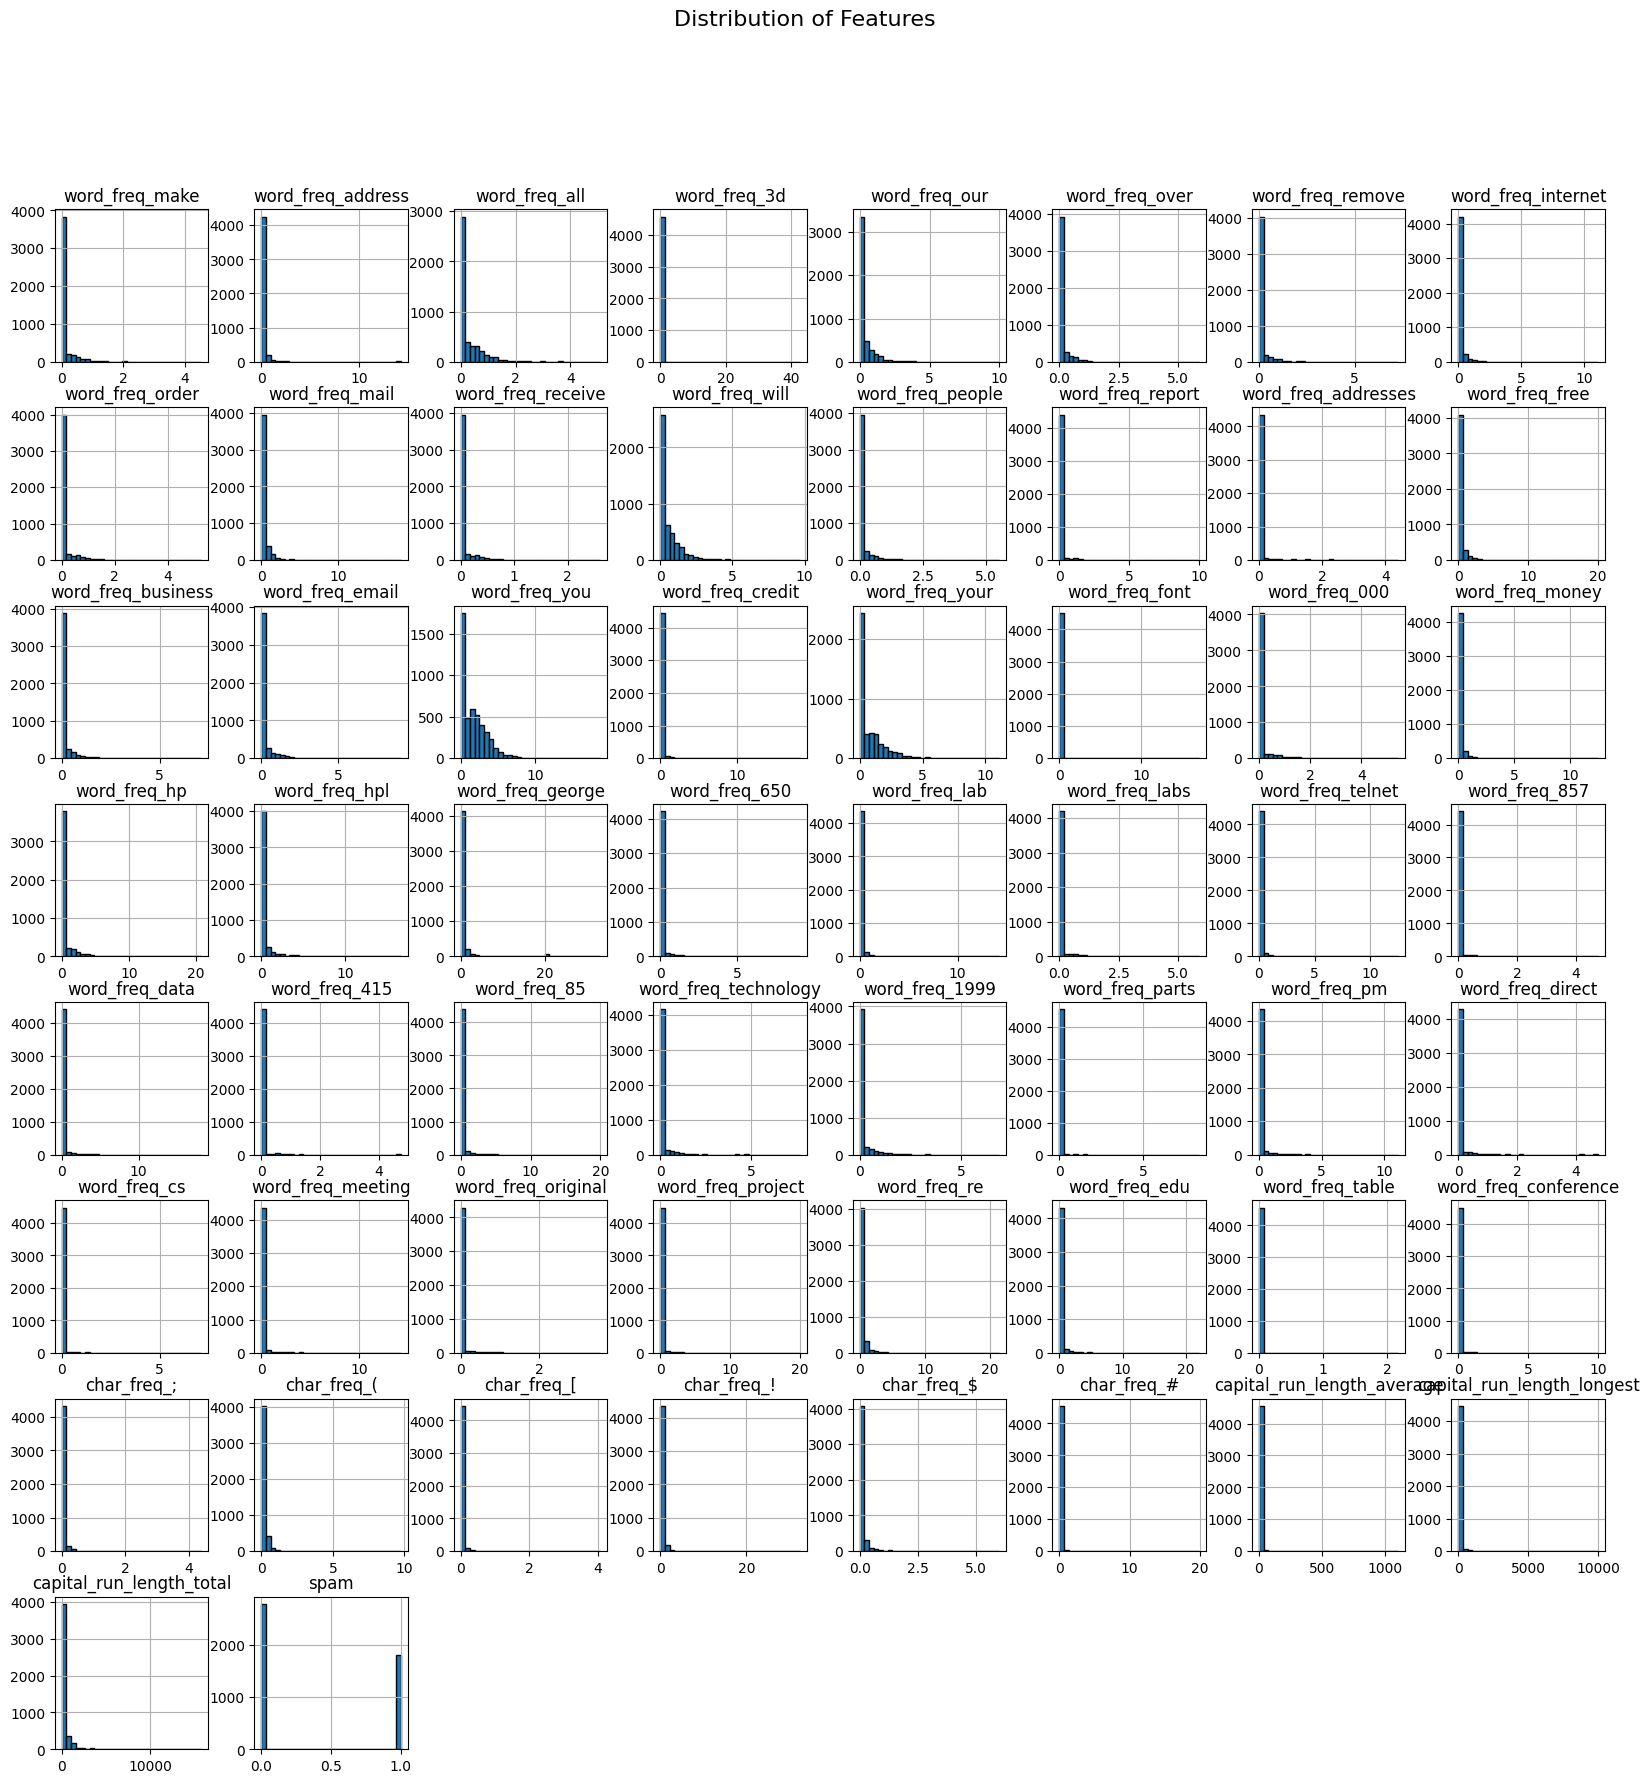

In [ ]:
# Data Visualizations

# 1. Visualizing the distribution of each feature
# Let's create histograms for all continuous features in the dataset
df.hist(figsize=(20, 20), bins=30, edgecolor='black')
plt.suptitle('Distribution of Features', size=16)
plt.show()

# Explanation:
# - Histograms give a clear picture of how the data is distributed for each feature.
# - We can observe if the data is skewed, has outliers, or is uniformly distributed.
# - Features with a very skewed distribution might require transformations, like log-scaling.


<ipython-input-10-b04c5584d960>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='spam', data=df, palette='coolwarm')


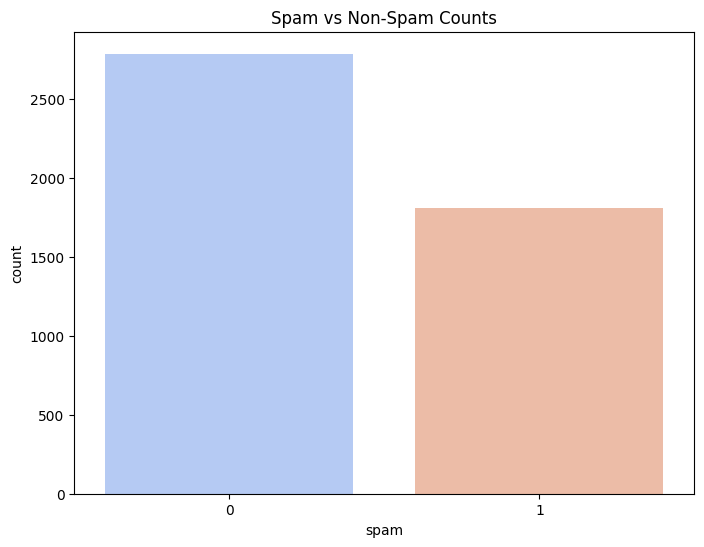

In [ ]:
# 2. Visualizing the relationship between features and the target variable
# Plot the distribution of the 'spam' class
plt.figure(figsize=(8, 6))
sns.countplot(x='spam', data=df, palette='coolwarm')
plt.title('Spam vs Non-Spam Counts')
plt.show()

# Explanation:
# - This count plot shows how many spam (1) and non-spam (0) samples we have in the dataset.
# - If there is a class imbalance, we will see it here. In case of imbalance, we may need to apply balancing techniques during modeling.


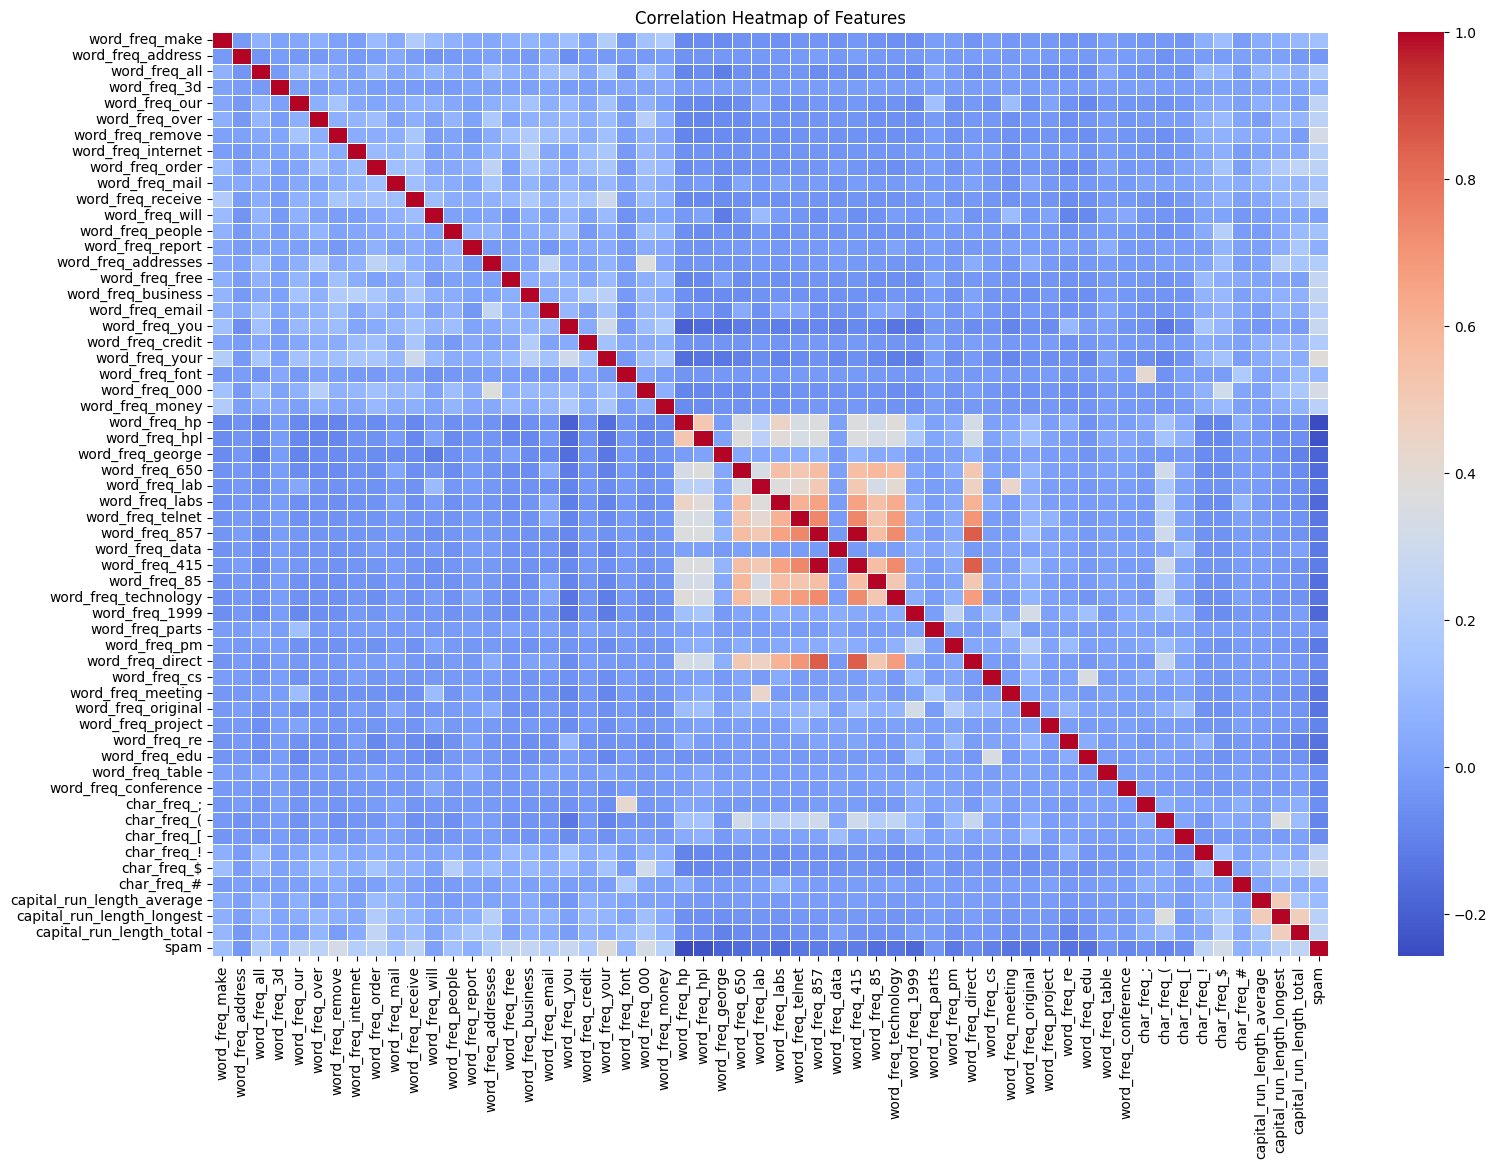

In [ ]:
# 3. Correlation heatmap to see the relationship between features
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap of correlations
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Explanation:
# - The correlation heatmap shows the strength of the linear relationship between features.
# - Values close to +1 or -1 mean features are highly correlated.
# - Highly correlated features might be redundant and could be removed to prevent multicollinearity, reducing model complexity.


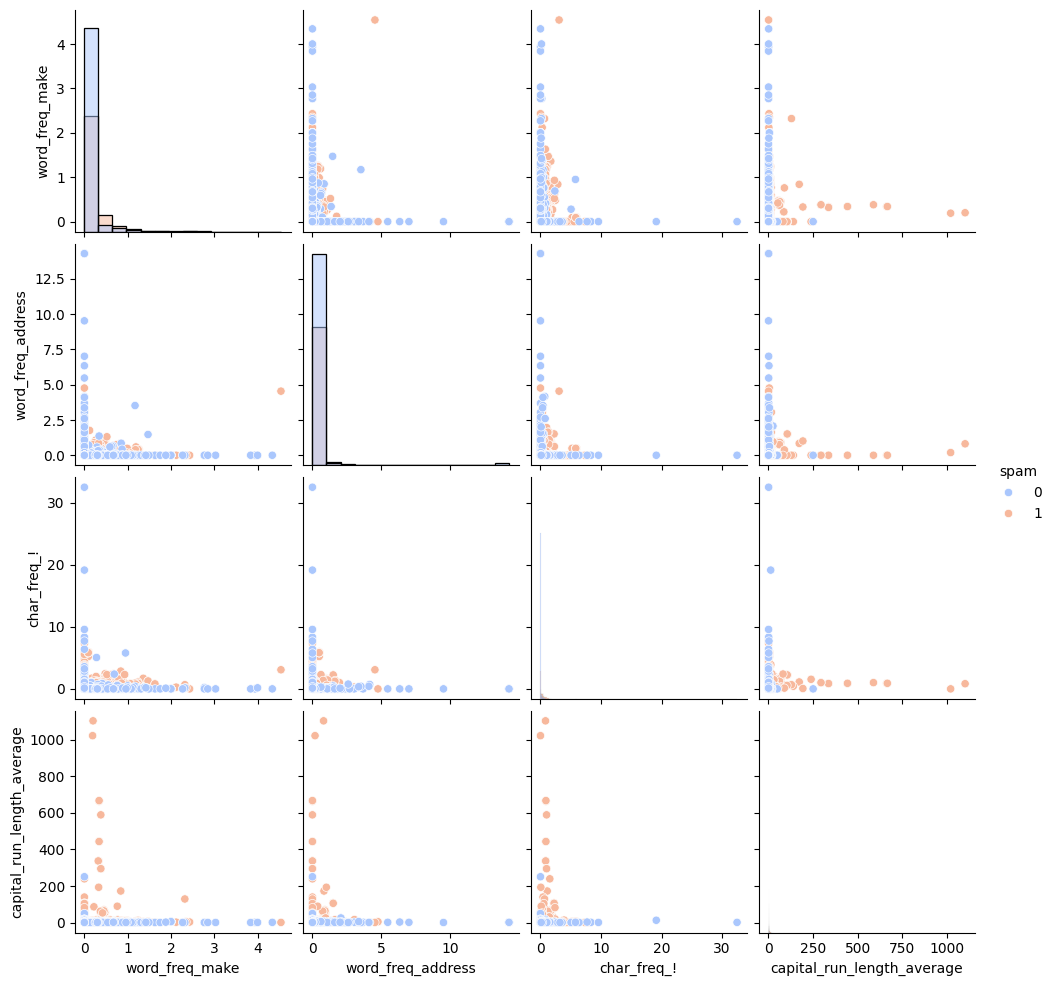

In [ ]:
# 4. Optional: Visualizing pair-wise relationships
# Note: This step can take time if you have many features. Here we show only selected features.
selected_columns = ['word_freq_make', 'word_freq_address', 'char_freq_!', 'capital_run_length_average', 'spam']
sns.pairplot(df[selected_columns], hue='spam', diag_kind='hist', palette='coolwarm')
plt.show()

# Explanation:
# - Pair plots show scatter plots between all pairs of selected features, helping us visualize their relationships.
# - They can reveal patterns that indicate how certain features might be useful for distinguishing between spam and non-spam emails.


In [ ]:
# - Since no missing values, we can proceed with normalization and further steps.

In [ ]:
# Normalize the dataset
# We'll use MinMaxScaler to scale all the features between 0 and 1.
# This is necessary because many machine learning algorithms perform better when input features are on the same scale.

# Separate the features and the target label (spam column)
# Assuming the last column is the target 'spam' (you can adjust if it's named differently)
X = df.iloc[:, :-1]  # Features (all columns except the last one)
y = df.iloc[:, -1]   # Target (the last column)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the features and transform them
X_scaled = scaler.fit_transform(X)

# Convert the normalized data back into a DataFrame for better understanding
X_scaled_df = pd.DataFrame(X_scaled, columns=df.columns[:-1])

# Add back the target column ('spam')
X_scaled_df['spam'] = y

# Display the first few rows of the normalized dataset
print("Normalized dataset:\n", X_scaled_df.head())

Normalized dataset:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0        0.000000           0.044818       0.125490           0.0   
1        0.046256           0.019608       0.098039           0.0   
2        0.013216           0.000000       0.139216           0.0   
3        0.000000           0.000000       0.000000           0.0   
4        0.000000           0.000000       0.000000           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0          0.032        0.000000          0.000000            0.000000   
1          0.014        0.047619          0.028886            0.006301   
2          0.123        0.032313          0.026135            0.010801   
3          0.063        0.000000          0.042641            0.056706   
4          0.063        0.000000          0.042641            0.056706   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0         0.000000        0.000000  ...     0.0000

In [ ]:
# At this point, the dataset is preprocessed, and the features have been normalized.
# The normalized dataset is now ready for feature selection and model training.

In [ ]:
# I initially intended to use ILFS method for feature selection but it gave problems in installation.
# Then decided to use use SelectkBest method, and asked AI feature of colab to generate the code.

In [ ]:
# prompt: based on above code, generate code to use a simple feature selection method for email spam filtering problem. Dataset has 57 features, I would like to reduce them to around 30

from sklearn.feature_selection import SelectKBest, f_classif

# Assuming X_scaled_df is your DataFrame with normalized features and 'spam' column
X = X_scaled_df.drop('spam', axis=1)  # Features
y = X_scaled_df['spam']  # Target

# Choose the number of features you want to select (e.g., 30)
k = 30

# Use SelectKBest with ANOVA F-value to select the top k features
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = list(X.columns[selected_feature_indices])

# Create a new DataFrame with only the selected features
X_selected = X[selected_features]

# Now X_selected contains only the top 30 features according to ANOVA F-value
print("Selected Features:", selected_features)
print("Shape of the dataset after feature selection:", X_selected.shape)

Selected Features: ['word_freq_all', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_labs', 'word_freq_85', 'word_freq_1999', 'word_freq_re', 'word_freq_edu', 'char_freq_!', 'char_freq_$', 'capital_run_length_longest', 'capital_run_length_total']
Shape of the dataset after feature selection: (4601, 30)


In [ ]:
# following are the next steps
# **Model Training**: Train 5 different classifiers using 10-fold cross-validation.
# **Evaluation**: Measure performance using accuracy, precision, recall, and F1 score.
# **Comparison**: Compare the performance of classifiers to choose the best one.

In [ ]:
# prompt: Next step is model training. Generate code to Train 5 different classifiers using 10-fold cross-validation. The models to be trained are Random Forest, ANN, SVM, Naive Bayes and KNN. Store the results so that we can measure performance using accuracy, precision, recall, and F1 score. Also I want to generate graphs and visualizations showing these comparative results.

from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
# Define the classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "ANN": MLPClassifier(max_iter=500),  # Increase max_iter for better convergence
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# Define the evaluation metrics
metrics = ["accuracy", "precision", "recall", "f1"]

# Create a dictionary to store results for each classifier
results = {}

# Perform 10-fold cross-validation for each classifier
for classifier_name, classifier in classifiers.items():
  cv_results = {}
  cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

  for metric in metrics:
    scores = cross_val_score(classifier, X_selected, y, cv=cv, scoring=metric)
    cv_results[metric] = scores.mean()

  results[classifier_name] = cv_results


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [ ]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results).transpose()

# Display the results
print("Cross-Validation Results:")
print(results_df)

Cross-Validation Results:
               accuracy  precision    recall        f1
Random Forest  0.952186   0.947474  0.929941  0.938294
ANN            0.941318   0.932326  0.923866  0.926726
SVM            0.923280   0.929160  0.872039  0.899552
Naive Bayes    0.878943   0.798876  0.928301  0.858297
KNN            0.902197   0.903352  0.842244  0.871462


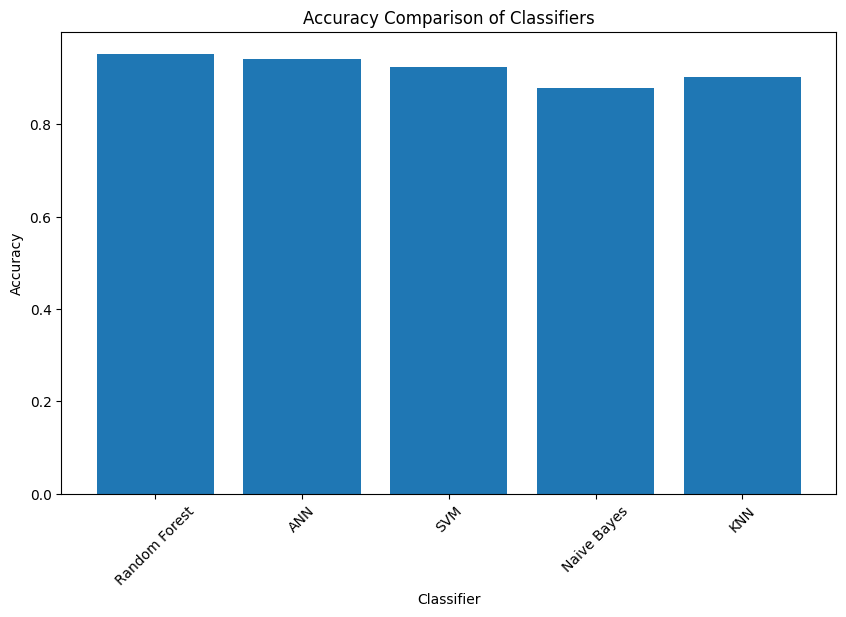

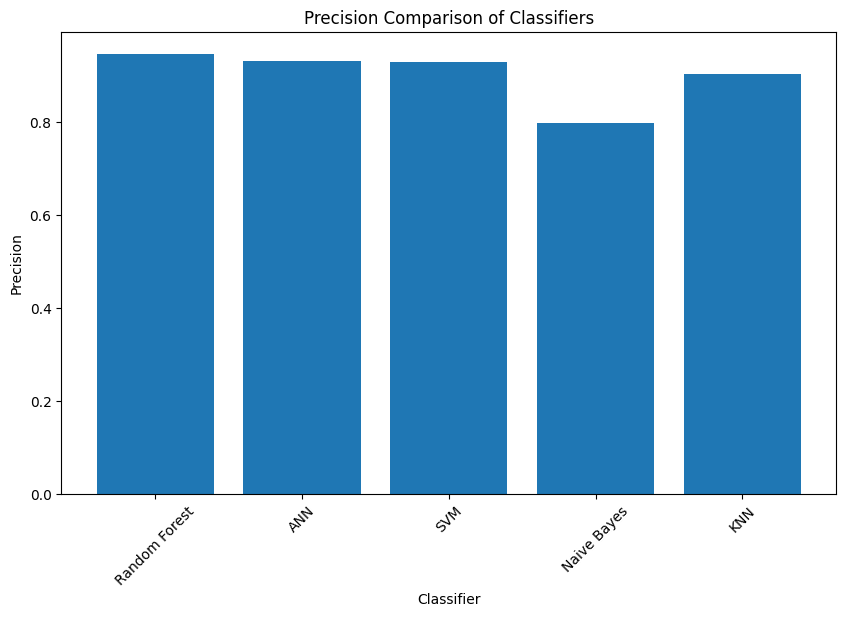

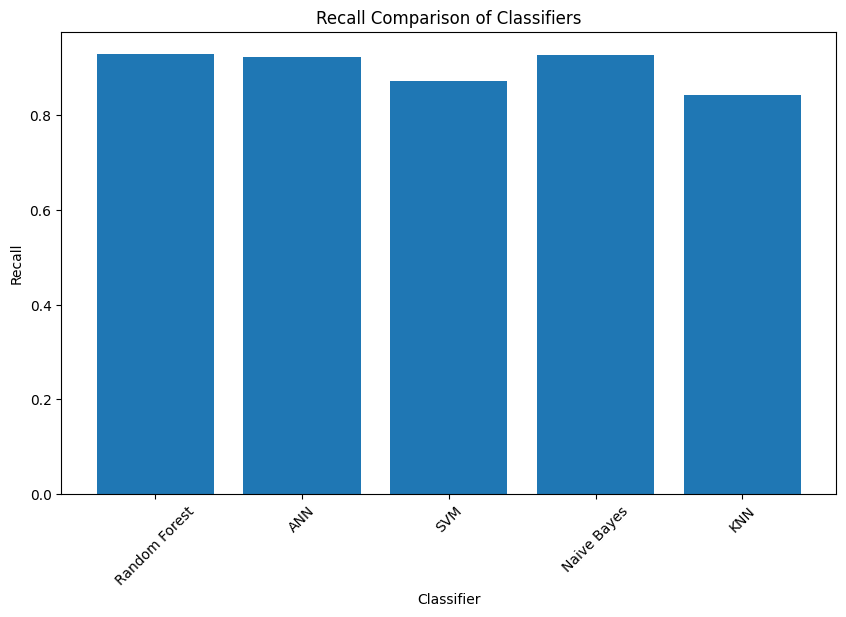

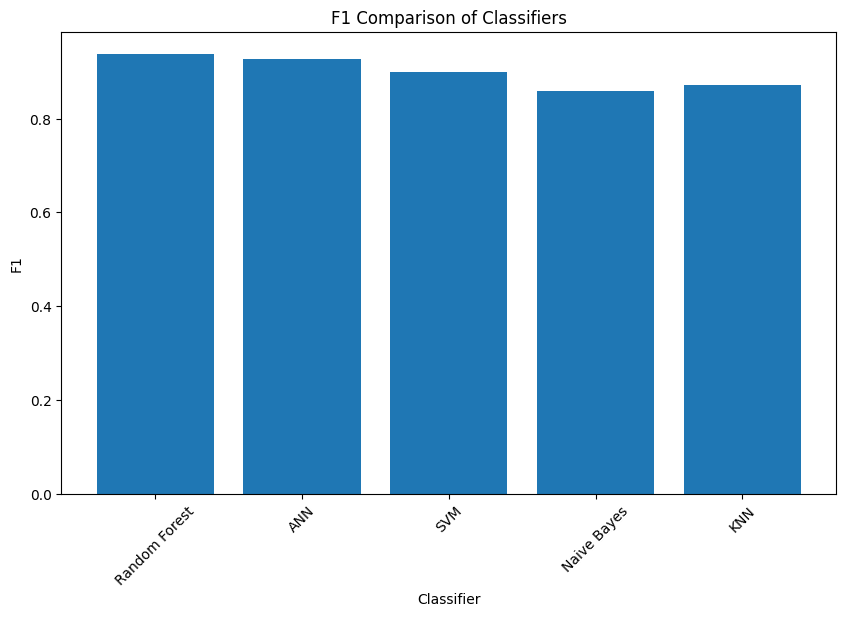

In [ ]:
# Visualize the results (using bar plots for each metric)
for metric in metrics:
  plt.figure(figsize=(10, 6))
  plt.bar(results_df.index, results_df[metric])
  plt.title(f"{metric.capitalize()} Comparison of Classifiers")
  plt.xlabel("Classifier")
  plt.ylabel(metric.capitalize())
  plt.xticks(rotation=45)
  plt.show()

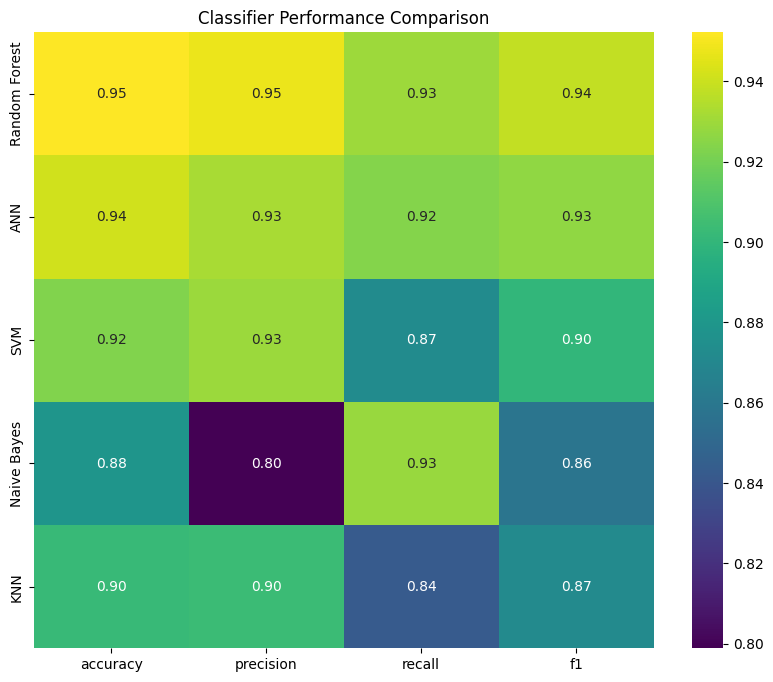

In [ ]:
# Generate a heatmap for easier comparison of different models and their metrics
plt.figure(figsize=(10, 8))
sns.heatmap(results_df, annot=True, cmap='viridis', fmt=".2f")
plt.title("Classifier Performance Comparison")
plt.show()

In [ ]:
# the above results are in line with the expected results as per the reseach, given for
# this project as a reference. Therefore decided to stop here and not proceed with
# hyper parameter tuning.